## Load Data

In [ ]:
result = pandas.read_excel("CHO-Cell-Surface-APOL1-IF\Results\result.xlsx")

## Plotting Results

In [ ]:
# Plot histogram of all APOL1 per cell intensities

plt.figure(figsize=(8, 6))
plt.hist(x=result['Intensity'], bins=100)
plt.xlim(0, 1)
plt.ylim(0, 500)

In [ ]:
untrans = result.loc[result['Condition'] == 'untransfected']

plt.figure(figsize=(8, 6))
plt.hist(x=untrans['Intensity'], bins=100)
plt.xlim(0, 1)
# plt.ylim(0, 500)

In [ ]:
q3 = untrans['Intensity'].quantile(.75)
q1 = untrans['Intensity'].quantile(.25)

q3 + 1.5*(q3-q1)

In [13]:
# Filter APOL1 per cell intensities by cutoff defined by GMM

filtered_result = result.loc[result['Intensity'] > .075]

apol1_exp_cells = filtered_result.groupby(['Condition', 'Timepoint', 'Replicate']).count()

non_exp_cells = result.groupby(['Condition', 'Timepoint', 'Replicate']).count()

In [14]:
per_exp = apol1_exp_cells/non_exp_cells*100
per_exp = per_exp.reset_index()
per_exp = per_exp.loc[per_exp['Condition'] != 'untransfected']
per_exp = per_exp.fillna(0)

[WinError 3] The system cannot find the path specified: 'C:\\Users\\paz2009\\Documents\\Experiments\\011 APOL1 (Joe) (Hunter)\\Image Analysis 2-20-19\\joe_output'
C:\Users\paz2009\Documents\Experiments\011 APOL1 (Joe) (Hunter)\CHO RUSH Image Analysis 02-20-19\CHO_RUSH_3


C:\Users\paz2009\Anaconda3\envs\CV\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


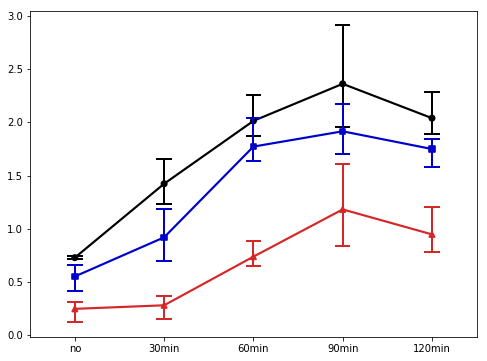

In [15]:
%cd "C:\Users\paz2009\Documents\Experiments\011 APOL1 (Joe) (Hunter)\Image Analysis 2-20-19\joe_output"

plt.figure(figsize=(8, 6))
ax = sns.pointplot(x='Timepoint', y='Intensity', hue='Condition', data=per_exp, 
              capsize=.15, errwidth=2, scale=.8,
              palette=["k", "mediumblue", "C3"], markers=["o", "s", "^"],
              order=['no', '30min', '60min', '90min', '120min'])
ax.set_xlabel('')
ax.set_ylabel('')
ax.get_legend().remove()
plt.savefig('Percent Expressing APOL1.png', dpi=300)

In [21]:
per_exp_mean = per_exp.groupby(['Condition', 'Timepoint']).mean().reset_index()
per_exp_min = per_exp_mean.reset_index().groupby(['Condition']).min().reset_index()

In [22]:
norm_per_exp_G0 = per_exp.loc[per_exp['Condition'] == 'G0']['Intensity'].divide \
                (per_exp_min.loc[per_exp_min['Condition'] == 'G0']['Intensity'][0])
norm_per_exp_G1 = per_exp.loc[per_exp['Condition'] == 'G1']['Intensity'].divide \
                (per_exp_min.loc[per_exp_min['Condition'] == 'G1']['Intensity'][1])
norm_per_exp_G2 = per_exp.loc[per_exp['Condition'] == 'G2']['Intensity'].divide \
                (per_exp_min.loc[per_exp_min['Condition'] == 'G2']['Intensity'][2])

In [23]:
per_exp['Norm Intensity'] = pd.concat([norm_per_exp_G0, norm_per_exp_G1, norm_per_exp_G2], axis=0)

C:\Users\paz2009\Documents\Experiments\011 APOL1 (Joe) (Hunter)\CHO RUSH Image Analysis 02-20-19\joe_output


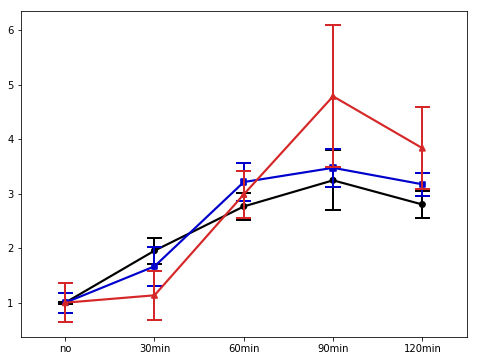

In [60]:
%cd "C:\Users\paz2009\Documents\Experiments\011 APOL1 (Joe) (Hunter)\CHO RUSH Image Analysis 02-20-19\joe_output"

plt.figure(figsize=(8, 6))
ax = sns.pointplot(x='Timepoint', y='Norm Intensity', hue='Condition', data=per_exp, ci = 'sd',
              capsize=.15, errwidth=2, scale=.8,
              palette=["k", "mediumblue", "C3"], markers=["o", "s", "^"],
              order=['no', '30min', '60min', '90min', '120min'])
ax.set_xlabel('')
ax.set_ylabel('')
ax.get_legend().remove()
plt.savefig('Percent Expressing APOL1 Norm to no SD.png', dpi=300)

In [28]:
%cd C:\Users\paz2009\Documents\Experiments\011 APOL1 (Joe) (Hunter)\CHO RUSH Image Analysis 02-20-19\joe_output

per_exp.to_excel('per_of_cells_norm_to_no.xlsx')

C:\Users\paz2009\Documents\Experiments\011 APOL1 (Joe) (Hunter)\CHO RUSH Image Analysis 02-20-19\joe_output


In [36]:
mean_int = result.groupby(['Condition', 'Timepoint', 'Replicate']).mean()

In [37]:
mean_int = mean_int.reset_index()
mean_int = mean_int.loc[mean_int['Condition'] != 'untransfected']
mean_int = mean_int.fillna(0)

In [38]:
mean_int_mean = mean_int.groupby(['Condition', 'Timepoint']).mean().reset_index()
mean_int_min = mean_int_mean.reset_index().groupby(['Condition']).min().reset_index()

In [39]:
norm_mean_int_G0 = mean_int.loc[mean_int['Condition'] == 'G0']['Intensity'].divide \
                (mean_int_min.loc[mean_int_min['Condition'] == 'G0']['Intensity'][0])
norm_mean_int_G1 = mean_int.loc[mean_int['Condition'] == 'G1']['Intensity'].divide \
                (mean_int_min.loc[mean_int_min['Condition'] == 'G1']['Intensity'][1])
norm_mean_int_G2 = mean_int.loc[mean_int['Condition'] == 'G2']['Intensity'].divide \
                (mean_int_min.loc[mean_int_min['Condition'] == 'G2']['Intensity'][2])

In [40]:
mean_int['Norm Intensity'] = pd.concat([norm_mean_int_G0, norm_mean_int_G1, norm_mean_int_G2], axis=0)
mean_int.to_excel('mean_int_norm_to_no.xlsx')

[WinError 3] The system cannot find the path specified: 'C:\\Users\\paz2009\\Documents\\Experiments\\011 APOL1 (Joe) (Hunter)\\Image Analysis 2-20-19\\joe_output'
C:\Users\paz2009\Documents\Experiments\011 APOL1 (Joe) (Hunter)\CHO RUSH Image Analysis 02-20-19\joe_output


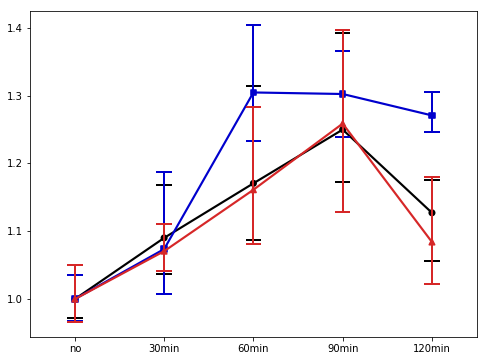

In [55]:
%cd "C:\Users\paz2009\Documents\Experiments\011 APOL1 (Joe) (Hunter)\Image Analysis 2-20-19\joe_output"

plt.figure(figsize=(8, 6))
ax = sns.pointplot(x='Timepoint', y='Norm Intensity', hue='Condition', data=mean_int,
              capsize=.15, errwidth=2, scale=.8,
              palette=["k", "mediumblue", "C3"], markers=["o", "s", "^"],
              order=['no', '30min', '60min', '90min', '120min'])
ax.set_xlabel('')
ax.set_ylabel('')
ax.get_legend().remove()
#plt.savefig('Normalized_Mean_Cell_Intensity Norm to Timepoint with Max Int.svg', dpi=150)

C:\Users\paz2009\Documents\Experiments\011 APOL1 (Joe) (Hunter)\CHO RUSH Image Analysis 02-20-19\joe_output


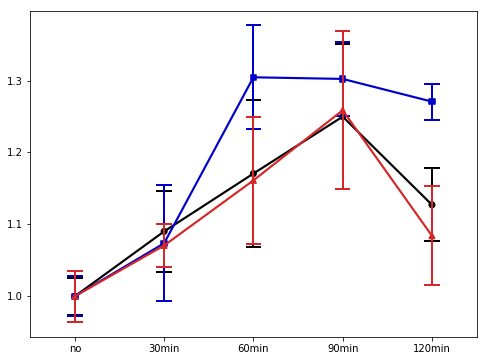

In [58]:
%cd "C:\Users\paz2009\Documents\Experiments\011 APOL1 (Joe) (Hunter)\CHO RUSH Image Analysis 02-20-19\joe_output"

plt.figure(figsize=(8, 6))
ax = sns.pointplot(x='Timepoint', y='Norm Intensity', hue='Condition', data=mean_int, ci = 'sd',
              capsize=.15, errwidth=2, scale=.8,
              palette=["k", "mediumblue", "C3"], markers=["o", "s", "^"],
              order=['no', '30min', '60min', '90min', '120min'])
ax.set_xlabel('')
ax.set_ylabel('')
ax.get_legend().remove()
plt.savefig('Normalized_Mean_Cell_Intensity Norm to no SD.png', dpi=300)

In [ ]:
f = plt.figure(figsize=(20, 16))

gs = gridspec.GridSpec(1, 2,
                       width_ratios=[1, 5])

ax1 = plt.subplot(gs[1])
ax2 = plt.subplot(gs[0])

sns.swarmplot(x="Condition", y="Intensity", hue="Timepoint", data=filtered_result, 
                   order = ['G0','G1','G2'],
                   hue_order=['no','30min','60min','90min','120min'],
                   palette="Set1", dodge=True, ax=ax1)
ax1.set_title('', fontsize=14)
ax1.set_xlabel('', fontsize=14)
ax1.set_ylabel('', fontsize=14)
ax1.legend(loc='upper right', fontsize=12)

sns.swarmplot(x="Condition", y="Intensity", hue="Timepoint", data=filtered_result, 
                   order = ['Untransfected'],
                   hue_order=['Untransfected'],
                   palette="Set1", dodge=True, ax=ax2)
ax2.set_title('', fontsize=14)
ax2.set_xlabel('', fontsize=14)
ax2.set_ylabel('APOL1 Signal Intensity', fontsize=14)
ax2.legend(loc='upper right', fontsize=12)

plt.savefig('Filtered Swarm Plot.svg', dpi=200)
plt.show()